#Image-based Prediction using `hugging face models`

In [1]:
!pip -q install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 382.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.5/297.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!apt install poppler-utils
!pip -q install pdf2image
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 2s (122 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed

In [3]:
import os
from unsloth import FastVisionModel
import torch
from datasets import load_dataset
from transformers import TextStreamer
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [4]:
!pip install -q huggingface_hub

from huggingface_hub import login

from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')
login(token=hf_token)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# model_name = 'meta-llama/Llama-3.2-11B-Vision-Instruct'
model_name = 'siddharthaspr/Llama-3.2-11B-Vision-bankstatement'
# model_name = 'unsloth/Llama-3.2-11B-Vision-Instruct'

In [16]:
model, tokenizer = FastVisionModel.from_pretrained(
    model_name,
    load_in_4bit = True,
    use_gradient_checkpointing = "unsloth",
)


==((====))==  Unsloth 2025.7.3: Fast Mllama patching. Transformers: 4.53.1.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.1+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.1
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.31.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `llm_int8_enable_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [8]:
model = FastVisionModel.get_peft_model(
    model,
    # finetune_vision_layers     = True,
    # finetune_language_layers   = True,
    # finetune_attention_modules = True,
    # finetune_mlp_modules      = True,
    r = 16,
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)


Unsloth: Making `model.base_model.model.model.vision_model.transformer` require gradients


In [ ]:
!git lfs install
!git clone https://huggingface.co/datasets/tusharshah2006/bank_statements_transactions /content/drive/MyDrive/bank_dataset


Git LFS initialized.
fatal: destination path '/content/drive/MyDrive/bank_dataset' already exists and is not an empty directory.


In [9]:
instruction = """
You are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format:

{
    "name": "...",
    "address": "...",
    "account number": "...",
    "ifsc code": "...",
    "branch": "...",
    "statement_period": "...",  # from which date to which date
    "bank name": "..."
}

If any information is missing or unclear, return the corresponding value as None or an empty string.
"""


In [ ]:
# instruction = "You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE(Type:Date),TXN_DESC(type:String),CHEQUE_REF_NO(type:String),WITHDRAWAL_AMT(type:Float),DEPOSIT_AMT(type:Float),BALANCE_AMT(type:Float).Think mathematically to match the current balance according to the deposits and withdrawals .note that one transaction can not have both withdrawal and deposit .if it is happeing skip that line  "

In [ ]:
import json
dataset = load_dataset("tusharshah2006/bank_statements_transactions", split = "train")


def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : json.loads(sample['ground_truth'])['gt_parse']['bank_stmt_entries']} ]
        },
    ]
    return { "messages" : conversation }
pass

converted_dataset = [convert_to_conversation(sample) for sample in dataset]


Resolving data files:   0%|          | 0/120 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE,TXN_DESC,CHEQUE_REF_NO,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT'},
    {'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x960>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': [{'TXN_DATE': '11/03/2021',
       'TXN_DESC': 'CASH',
       'CHEQUE_REF_NO': 'NA',
       'WITHDRAWAL_AMT': 'NA',
       'DEPOSIT_AMT': '500.00',
       'BALANCE_AMT': '15696.85Cr'},
      {'TXN_DATE': '17/03/2021',
       'TXN_DESC': 'CASH',
       'CHEQUE_REF_NO': 'NA',
       'WITHDRAWAL_AMT': '120.00',
       'DEPOSIT_AMT': 'NA',
       'BALANCE_AMT': '15576.85Cr'},
      {'TXN_DATE': '6/03/2021',
       'TXN_DESC': 'AMC ATWORD-PMA920-02',
       'CHEQUE_REF_NO': 'NA',
       'WITHDRAWAL_AMT': '23.60',
       'DEPOSIT_AMT': 'NA',
   

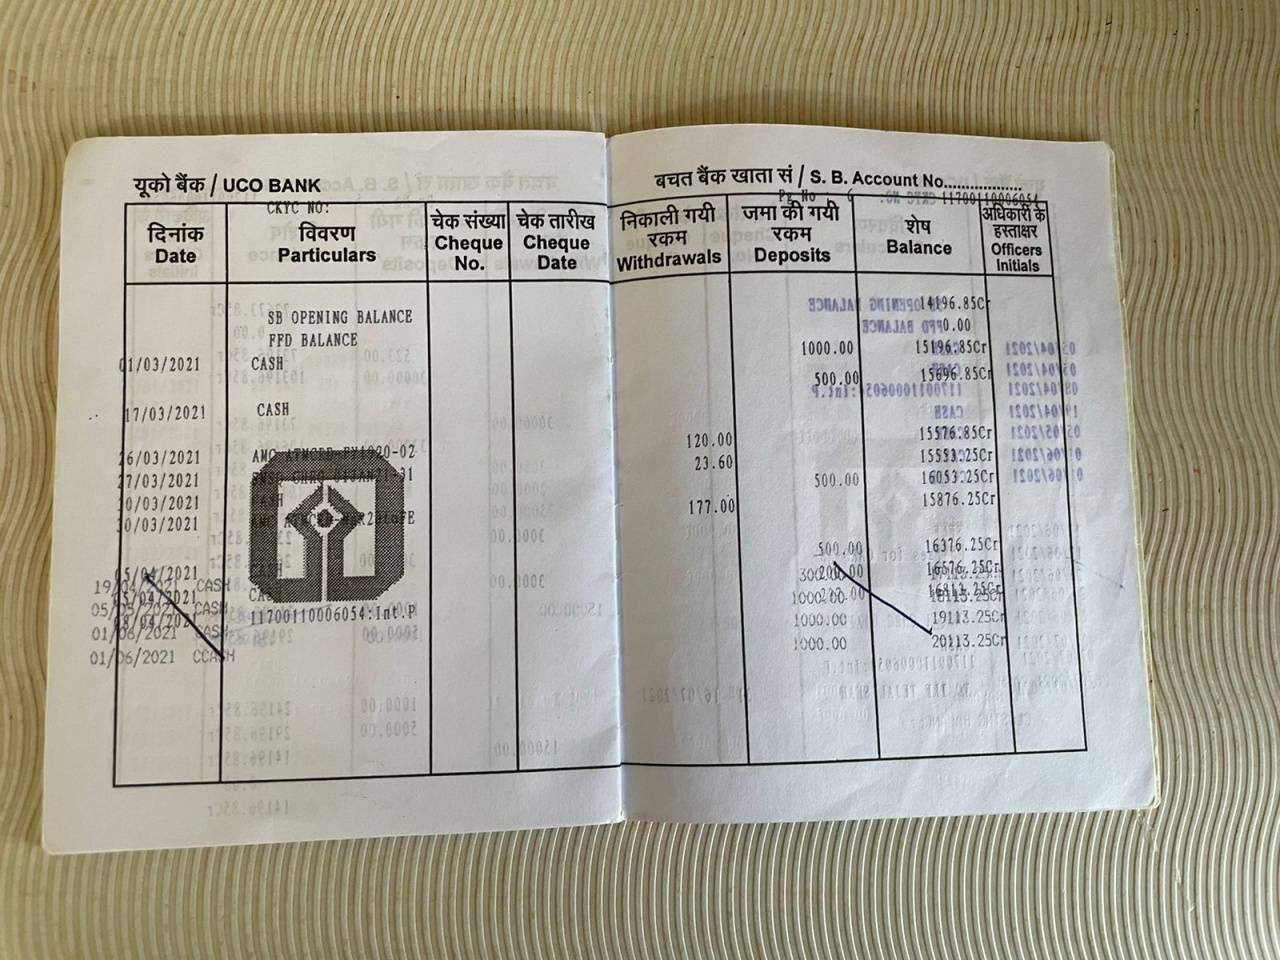

In [ ]:
import json
# json.loads(dataset[0]['ground_truth'])['gt_parse']['bank_stmt_entries']
dataset[0]['image']

In [ ]:
from PIL import Image

image_path = "/content/drive/MyDrive/bankstatement/Screenshot 2025-07-13 211614.png"
image = Image.open(image_path).convert("RGB")  # Always convert to RGB for consistency


In [17]:
from pdf2image import convert_from_path

# Path to your PDF file
pdf_path = "/content/drive/MyDrive/bankstatement/401361203-Axis-Bank-Sttmnt.pdf"

# Convert PDF to list of PIL images (one per page)
images = convert_from_path(pdf_path, dpi=300)  # dpi can be 200–300 for good OCR

# Now 'images' is a list of PIL.Image objects
print(f"Extracted {len(images)} pages as images")


Extracted 7 pages as images


In [26]:
# prompt: write code to store the images

# Specify the directory to save the images
# output_dir = "/content/"
# os.makedirs(output_dir, exist_ok=True)

# Save each image page
for i, img in enumerate(images):
    output_dir = f"/content/sample_{i}"
    os.makedirs(output_dir, exist_ok=True)
    image_filename = f"page_{i+1}.png"
    image_filepath = os.path.join(output_dir, image_filename)
    img.save(image_filepath, 'PNG')
    print(f"Saved {image_filepath}")

Saved /content/sample_0/page_1.png
Saved /content/sample_1/page_2.png
Saved /content/sample_2/page_3.png
Saved /content/sample_3/page_4.png
Saved /content/sample_4/page_5.png
Saved /content/sample_5/page_6.png
Saved /content/sample_6/page_7.png


In [11]:
image = images[0]

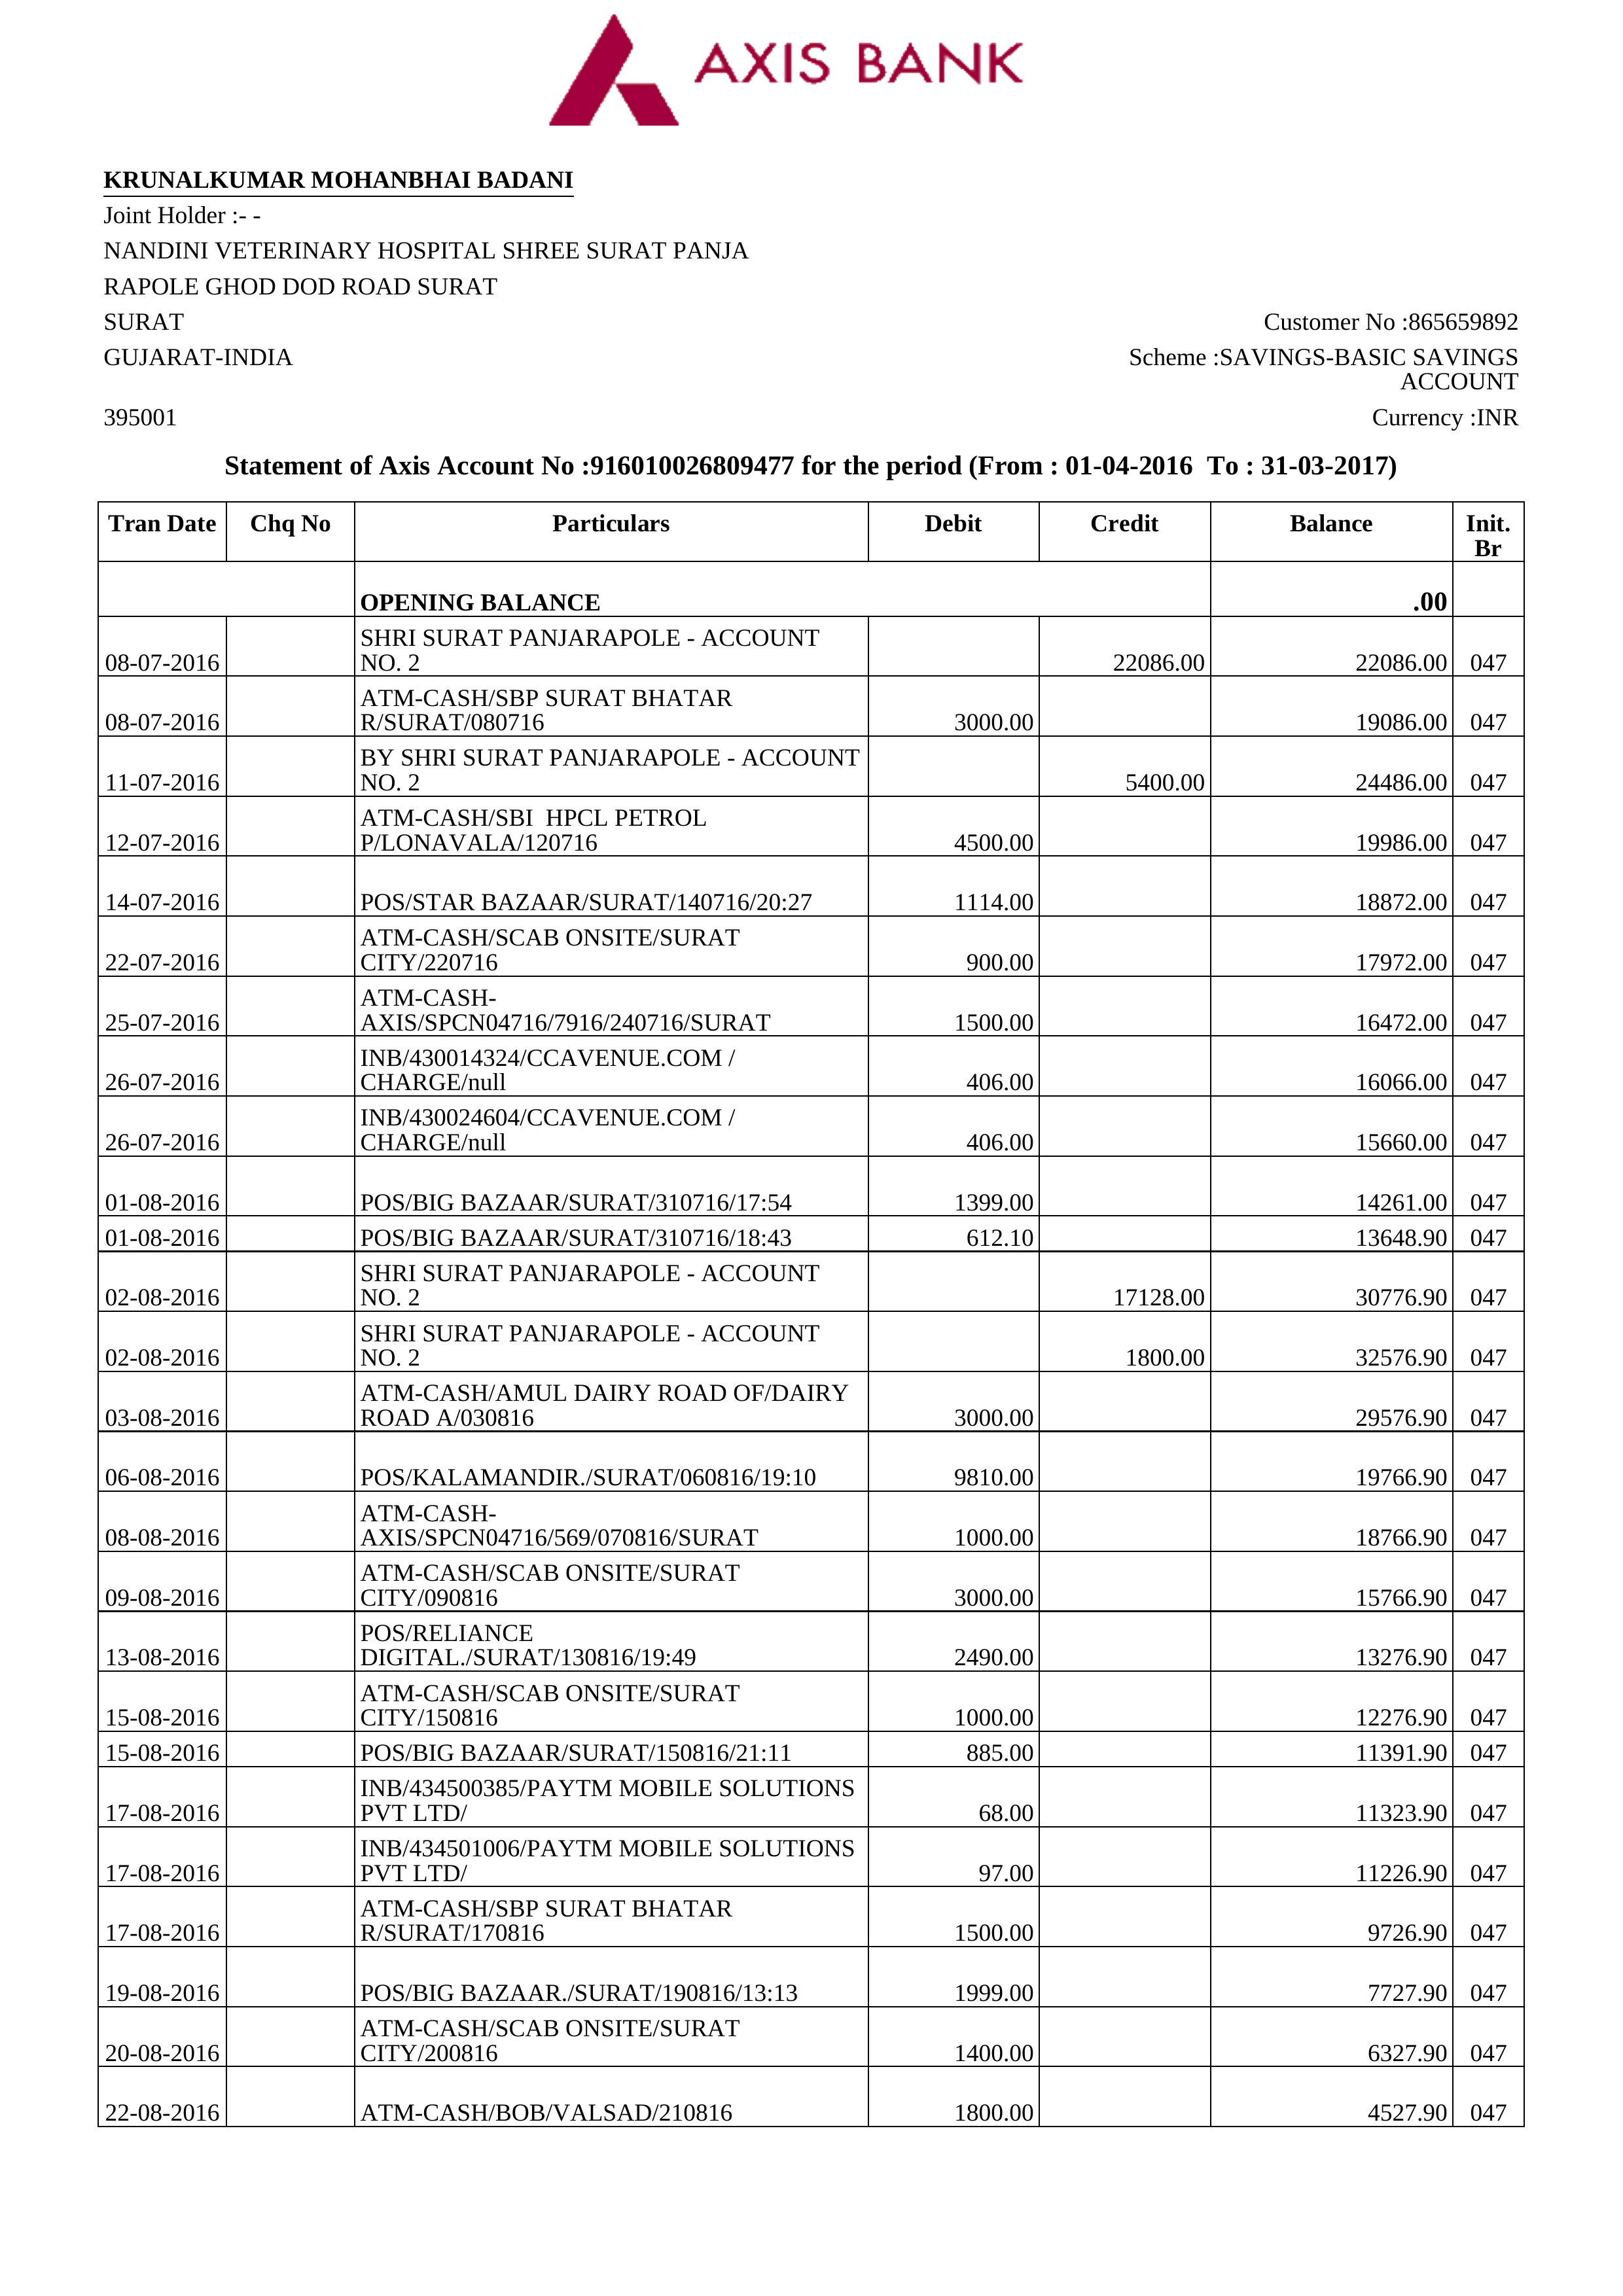

In [12]:
FastVisionModel.for_inference(model)
# image = dataset[0]["image"]
# instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")
image

In [13]:
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 4096,
                   use_cache = True, temperature = 0.9, min_p = 0.2)

The following details can be accurately extracted from the bank statement:

*   **Name**: KRUNALKUMAR MOHANBHAI BADANI
*   **Address**: NANDINI VETERINARY HOSPITAL SHREE SURAT PANJA, RAPOLE GHOD DOD ROAD SURAT, SURAT, GUJARAT-INDIA, 395001
*   **Account Number**: 91601002609477
*   **IFSC Code**: SAVINGS-BASIC SAVINGS
*   **Branch**: Customer No : 865659892
*   **Statement Period**: From 01-04-2016 to 31-03-2017
*   **Bank Name**: AXIS BANK<|eot_id|>


In [14]:
text_streamer.

AttributeError: 'TextStreamer' object has no attribute 'get_text'

In [ ]:
from transformers import TextStreamer
from io import StringIO

class CapturingStreamer(TextStreamer):
    def __init__(self, tokenizer, skip_prompt=True):
        super().__init__(tokenizer, skip_prompt=skip_prompt)
        self.output = StringIO()

    def on_final_text(self, text, stream_end=False):
        # Store the final text
        self.output.write(text)
        # Also print to console (like standard streamer)
        super().on_final_text(text, stream_end)

    def get_text(self):
        return self.output.getvalue()


In [ ]:
# Initialize the streamer
streamer = CapturingStreamer(tokenizer, skip_prompt=True)

# Generate tokens with streaming
_ = model.generate(
    **inputs,
    streamer=streamer,
    max_new_tokens=8192,
    use_cache=True,
    temperature=0.9,
    top_p=0.9
)

# Retrieve the captured output
generated_text = streamer.get_text()

print("🧾 Stored Output:\n", generated_text)


[{'TXN_DATE': '02/01/18', 'TXN_DESC': 'ACH D- TP ACH TATA MOTOR FN-71806131', 'CHEQUE_REF_NO': '0000001272174413', 'WITHDRAWAL_AMT': '13,179.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '6,941.48'}, {'TXN_DATE': '03/01/18', 'TXN_DESC': 'IMPS-800310164682-NIKHIL SINGH-PUNB-XXXX', 'CHEQUE_REF_NO': '0000800310164682', 'WITHDRAWAL_AMT': '4,000.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '2,941.48'}, {'TXN_DATE': '05/01/18', 'TXN_DESC': 'ANI TECHNOLOGI-SINGH, AKHILESH', 'CHEQUE_REF_NO': '0000801043063409', 'WITHDRAWAL_AMT': '1,716.66', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '4,658.14'}, {'TXN_DATE': '06/01/18', 'TXN_DESC': 'IB BILLPAY DR-HDFCTT-524181XXXXXXX2757', 'CHEQUE_REF_NO': 'IB06-18040406273700', 'WITHDRAWAL_AMT': '1,000.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '3,658.14'}, {'TXN_DATE': '09/01/18', 'TXN_DESC': 'IMPS-800918145881-SURAJ SHANTILAL JAIN-U', 'CHEQUE_REF_NO': '0000800918145881', 'WITHDRAWAL_AMT': '2,450.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '1,208.14'}, {'TXN_DATE': '09/01/18', '

In [ ]:
generated_text

''

In [ ]:
import torch

# Generate output tokens (without streaming)
generated_ids = model.generate(
    **inputs,
    max_new_tokens=4096,
    # do_sample=True,           # optional: for creative generation
    temperature=0.9,
    top_p=0.9,
    use_cache=True
)

# Decode the output tokens to string
generated_text = tokenizer.batch_decode(generated_ids, skip_prompt=True)[0]

print("🧾 Output:\n", generated_text)


🧾 Output:
 <|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE(Type:Date),TXN_DESC(type:String),CHEQUE_REF_NO(type:String),WITHDRAWAL_AMT(type:Float),DEPOSIT_AMT(type:Float),BALANCE_AMT(type:Float).Think mathematically to match the current balance according to the deposits and withdrawals  <|eot_id|><|start_header_id|>assistant<|end_header_id|>

[{'TXN_DATE': '06-04-2022', 'TXN_DESC': 'NEFT-N096221115721928-RESILIENT INNOVATIONS PRIVAT', 'CHEQUE_REF_NO': 'NA', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': '1,491.98', 'BALANCE_AMT': '52,690.88'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003994XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '42,666.10'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003995XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHD

In [ ]:
generated_text

"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\n<|image|>You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE(Type:Date),TXN_DESC(type:String),CHEQUE_REF_NO(type:String),WITHDRAWAL_AMT(type:Float),DEPOSIT_AMT(type:Float),BALANCE_AMT(type:Float).Think mathematically to match the current balance according to the deposits and withdrawals  <|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n[{'TXN_DATE': '06-04-2022', 'TXN_DESC': 'NEFT-N096221115721928-RESILIENT INNOVATIONS PRIVAT', 'CHEQUE_REF_NO': 'NA', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': '1,491.98', 'BALANCE_AMT': '52,690.88'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003994XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '42,666.10'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003995XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_

In [ ]:
FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

trainer_stats = trainer.train()

used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")


GPU = NVIDIA A100-SXM4-40GB. Max memory = 39.557 GB.
18.469 GB of memory reserved.


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 119 | Num Epochs = 2 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 67,174,400 of 10,737,395,235 (0.63% trained)


451.8107 seconds used for training.
7.53 minutes used for training.
Peak reserved memory = 18.469 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 46.69 %.
Peak reserved memory for training % of max memory = 0.0 %.


In [ ]:
from PIL import Image

image_path = "/content/drive/MyDrive/bankstatement/BANKOFBARODA0001.jpg"
image = Image.open(image_path).convert("RGB")  # Always convert to RGB for consistency


In [ ]:
print("\nAfter training:\n")
FastVisionModel.for_inference(model)
# image = dataset[0]["image"]
# instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
from transformers import TextStreamer
import torch

# # Custom streamer to capture output in a variable
# class CapturingTextStreamer(TextStreamer):
#     def __init__(self, tokenizer, **kwargs):
#         super().__init__(tokenizer, **kwargs)
#         self.generated_text = ""

#     def on_final_token(self, token_id: int):
#         text = self.tokenizer.decode([token_id], skip_special_tokens=True)
#         self.generated_text += text

#     def get_text(self):
#         return self.generated_text

# # Prepare input
# input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
# inputs = tokenizer(
#     image,
#     input_text,
#     add_special_tokens=False,
#     return_tensors="pt",
# ).to("cuda")

# # Use the custom streamer
# streamer = CapturingTextStreamer(tokenizer, skip_prompt=True)

# # Generate output
# _ = model.generate(
#     **inputs,
#     streamer=streamer,
#     max_new_tokens=4096,
#     use_cache=True,
#     temperature=1.0,
#     min_p=0.1
# )

# Access the result
# generated_output = streamer.get_text()
# print("🔍 Model Output:\n", generated_output)


text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 4096,
                   use_cache = True, temperature = 0.9, min_p = 0.2)


After training:

Here is the extracted information in a structured Python dictionary format:

{
    "name": "KRISHNA DAILYNEED STORE",
    "address": "RAJVEER FURNITURE HOUSE KE PASS AGRA ROAD CHUNGI ETAH THANDI SARAK ETAH, UTTAR PRADESH Uttar Pradesh 207001 UP",
    "account number": "10350200002092",
    "ifsc code": "BARB0ETAHXX",
    "branch": "ETAH, UTTAR PRADESH",
    "statement_period": "06-04-2022 to 05-07-2022",
    "bank name": "Bank of Baroda"
}<|eot_id|>


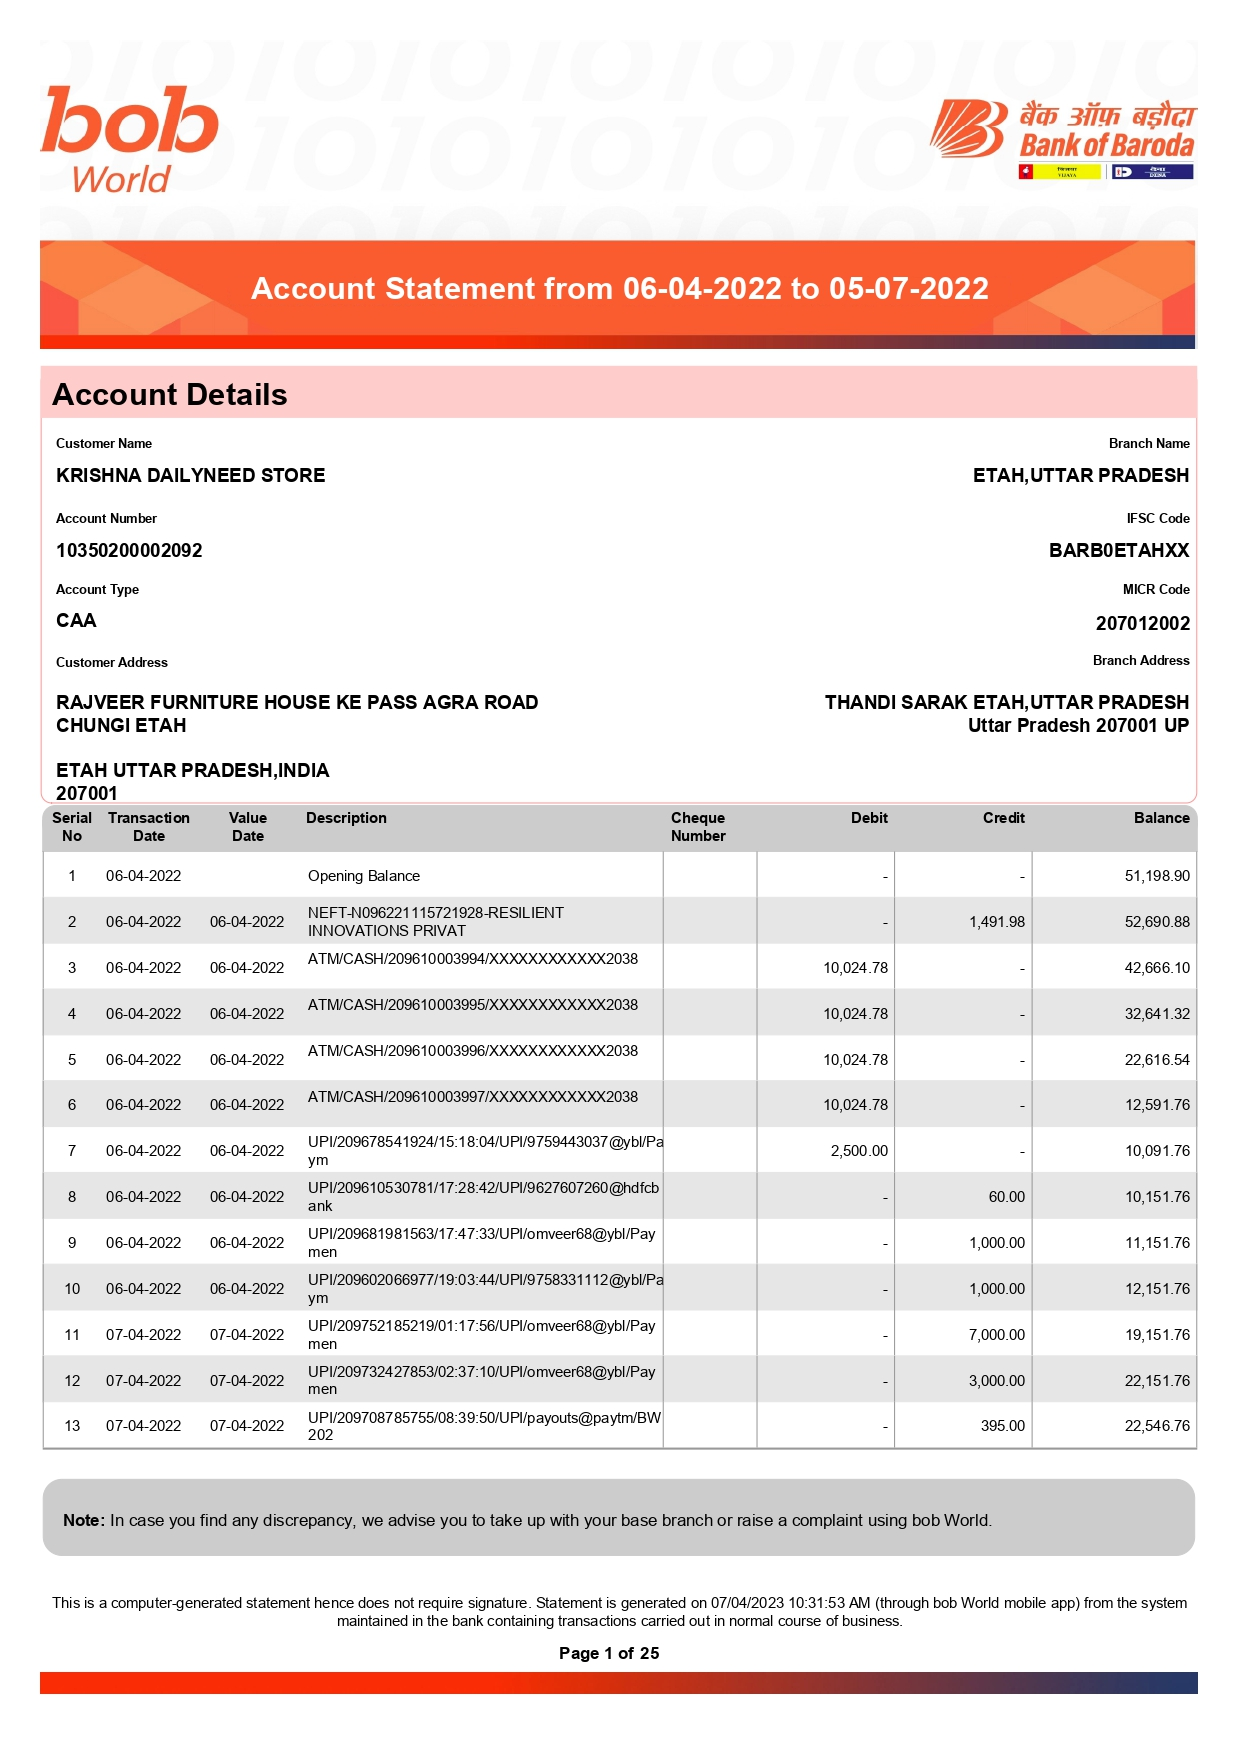

In [ ]:
image

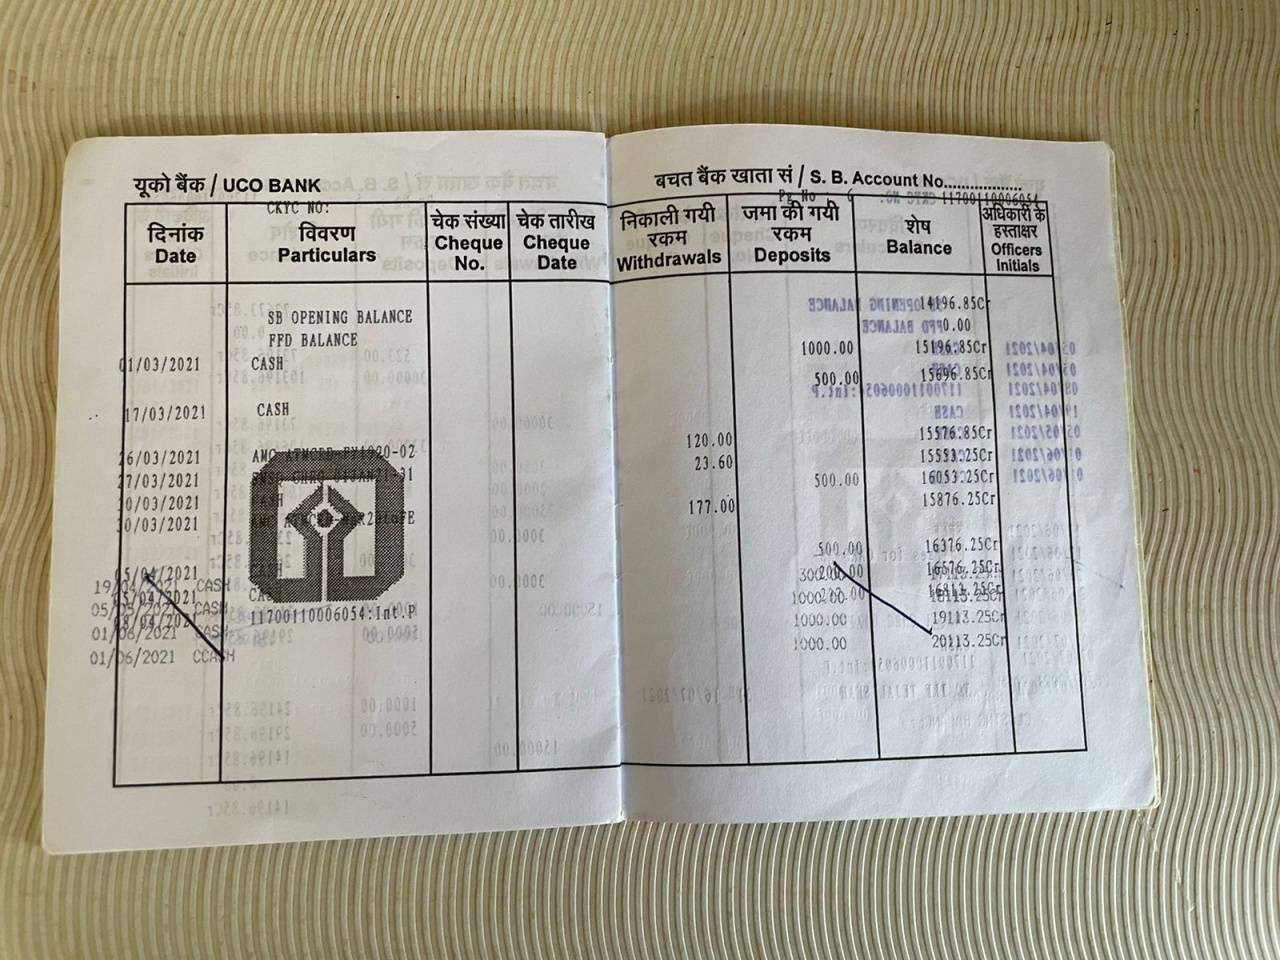

In [ ]:
import json
# json.loads(dataset[0]['ground_truth'])['gt_parse']['bank_stmt_entries']
dataset[0]['image']

In [ ]:
model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

model.save_pretrained_merged("siddharthaspr/Llama-3.2-11B-Vision-bankstatement", tokenizer,)
model.push_to_hub_merged("siddharthaspr/Llama-3.2-11B-Vision-bankstatement", tokenizer, save_method = "merged_16bit", token = os.environ.get("HF_TOKEN"))

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00005.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  20%|██        | 1/5 [00:35<02:20, 35.02s/it]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  40%|████      | 2/5 [01:33<02:25, 48.61s/it]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  60%|██████    | 3/5 [02:10<01:26, 43.36s/it]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  80%|████████  | 4/5 [02:42<00:39, 39.12s/it]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 5/5 [02:53<00:00, 34.70s/it]
No files have been modified since last commit. Skipping to prevent empty commit.


Uploading...:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00005.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  20%|██        | 1/5 [01:41<06:45, 101.40s/it]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  40%|████      | 2/5 [03:34<05:24, 108.16s/it]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  60%|██████    | 3/5 [05:28<03:41, 110.76s/it]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  80%|████████  | 4/5 [07:20<01:51, 111.57s/it]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 5/5 [07:58<00:00, 95.64s/it]


In [ ]:
!pip -q install pytesseract

In [ ]:
import pytesseract
from PIL import Image
from transformers import pipeline

# Optional for Windows users
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image_path = "/content/drive/MyDrive/bankstatement/BANKOFBARODA0001.jpg"  # or .png, .jpeg
image = Image.open(image_path)

# Step 1: Extract text from image
extracted_text = pytesseract.image_to_string(image)

# Step 2: Load QA model
qa_model = pipeline("question-answering", model="ChakuChidiya/bank_statement_qa_model_4")

# Step 3: Questions to extract details
questions = {
    "name": "What is the name of the account holder?",
    "address": "What is the address mentioned in the statement?",
    "account number": "What is the account number?",
    "ifsc code": "What is the IFSC code?",
    "branch": "Which branch is the account from?",
    "statement_period": "What is the statement period or date range?",
    "bank name": "What is the name of the bank?"
}

# Step 4: Run QA for each detail
results = {}
for key, question in questions.items():
    try:
        result = qa_model(question=question, context=extracted_text)
        results[key] = result['answer']
    except:
        results[key] = None  # In case model fails for any reason

# Step 5: Output the extracted data
print(results)


OSError: bank_statement_qa_model_4 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`